### Importing Modules


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

sns.set()

### Getting data

In [132]:
seaborn.set()

data = pd.read_csv('sample2.csv')

### Splitting data as train data & test data

In [133]:
trainData,testData = train_test_split(data)
testData.rename(columns = {'Price':'Actual Price'}, inplace = True)
   
#Output
y = trainData[['Price']]

#Input
x = trainData[['Area','Rooms']]


### Ploting Raw Data

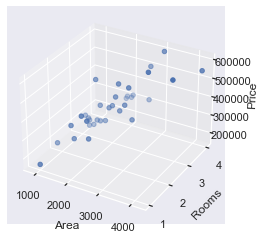

In [134]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('Area')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')
ax.scatter3D(x['Area'].to_numpy(), x['Rooms'].to_numpy(), y.to_numpy() ,cmap='Greens')
plt.show()

### Standardization

In [135]:
#Standardisation
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

### Plotting Scaled Data

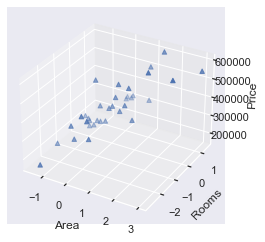

In [136]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('Area')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')
ax.scatter3D(x_scaled[:,0], x_scaled[:,1], y.to_numpy() ,cmap='Greens', marker='^')
plt.show()

### Regression

In [137]:
#regression
lreg = LinearRegression()

lreg.fit(x_scaled,y)

#R-Squared (predict/actual)
r = lreg.score(x_scaled,y)

#Getting coefficients
b = lreg.coef_

#Getting intercepts
b0 = lreg.intercept_[0]

lreg.score(x_scaled,y)
n = x_scaled.shape[0]
p = x_scaled.shape[1]


### R-squared

In [138]:
#R-square

r_squared = lreg.score(x_scaled,y)


### Adjusted R^2
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [139]:

n = x.shape[0]
p = x.shape[1]

#Adjusted R-square(for multiple-linear-regression)
adj_r_squared = 1 -(1-r**2)*(n-1)/(n-p-1)


### Feature selection

In [140]:
#Feature-Selection(getting p-values)
p_values = f_regression(x_scaled,y)[1]
p_values = p_values.round(3)
chart = pd.DataFrame({'Intercept':[b0,'-'],'R-sq.':[r_squared,'-'],'Adj-R-sq.':[adj_r_squared,'-'] ,'features':x.columns.values,'p-values':p_values,'Coefficients':b[0]})
chart


c:\users\cheth\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Intercept,R-sq.,Adj-R-sq.,features,p-values,Coefficients
0,338717.057143,0.683287,0.433561,Area,0.000,98003.762673
1,-,-,-,Rooms,0.022,-2180.266923


### Prediction

In [141]:

testData_scaled = scaler.transform(testData[['Area','Rooms']])
#Making prediction
testData['Predicted Price']= lreg.predict(testData_scaled).round(0)
print(testData)

    Area  Rooms  Actual Price  Predicted Price
35  1437      3        249900         268215.0
6   1534      3        314900         280881.0
43  1200      3        299000         237268.0
13  4478      5        699900         659227.0
37  2132      4        345000         355928.0
23  1962      4        259900         333729.0
7   1427      3        198999         266909.0
14  1268      3        259900         246147.0
39  2162      4        287000         359845.0
10  1940      4        239999         330857.0
15  2300      4        449900         377865.0
4   3000      4        539900         469271.0


### Removing one variable and predicting the result


In [142]:
regSimple = LinearRegression()
regSimple.fit(x_scaled[:,0].reshape(-1,1),y)
testData["Predicted Price(Without rooms)"]=regSimple.predict(testData_scaled[:,0].reshape(-1,1))
print(testData)

    Area  Rooms  Actual Price  Predicted Price  Predicted Price(Without rooms)
35  1437      3        249900         268215.0                   268975.504032
6   1534      3        314900         280881.0                   281505.142219
43  1200      3        299000         237268.0                   238361.851968
13  4478      5        699900         659227.0                   661786.119756
37  2132      4        345000         355928.0                   358749.715781
23  1962      4        259900         333729.0                   336790.556073
7   1427      3        198999         266909.0                   267683.788755
14  1268      3        259900         246147.0                   247145.515851
39  2162      4        287000         359845.0                   362624.861612
10  1940      4        239999         330857.0                   333948.782463
15  2300      4        449900         377865.0                   380450.532434
4   3000      4        539900         469271.0      

### Overfitting & Underfitting